# EDA Wine Quality 

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
- This project understands how the wine quality is affected by other variables such as fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol quality

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Loading the dataset and showing the first few records
df = pd.read_csv('data/winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [24]:
# Checking for statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [25]:
# Checking for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [26]:
# using median to fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\108713856.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\108713856.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
# Creating a function to display annotations on graphs
def display_annot(plt):
    for p in plt.patches:
        plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

<Axes: >

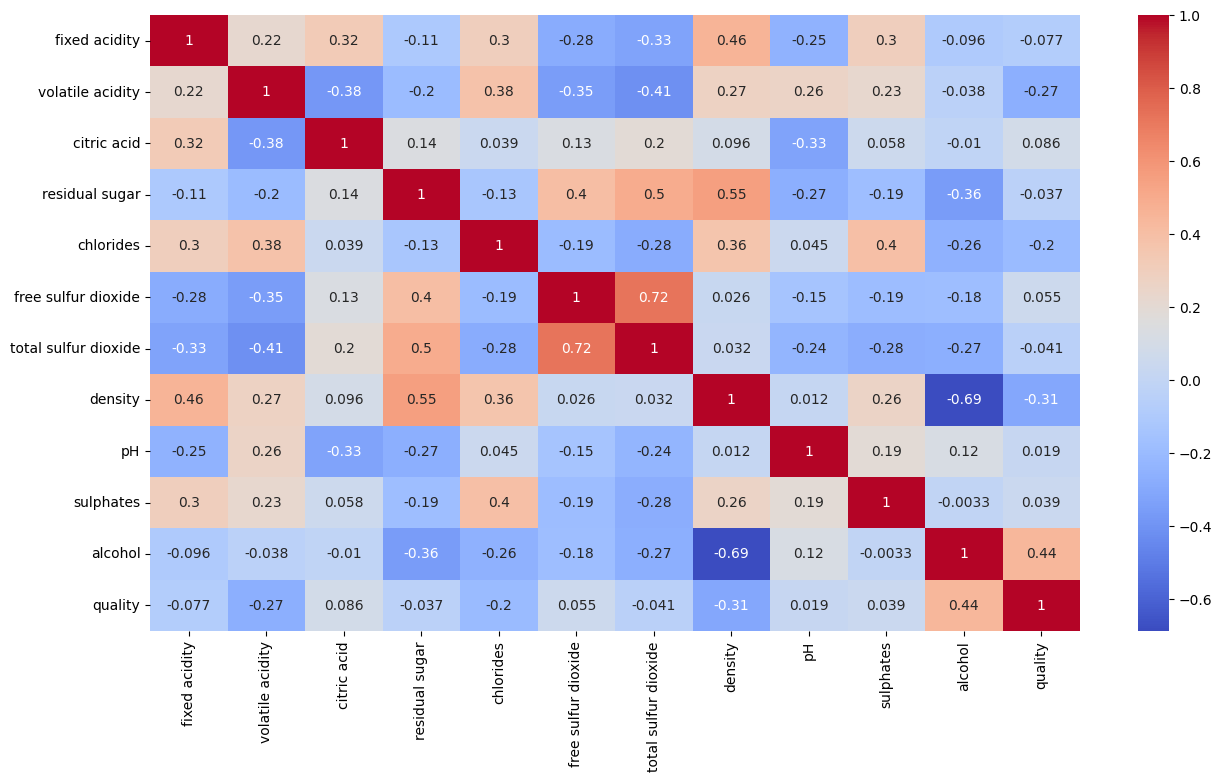

In [28]:
# Heatmap to visualize the correlation between numerical features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Insights from heatmap
- alcohol and quality have positive correlation(i.e two variables move in same direction)
- fixed acid and density have positive correlation
- density and alcohol have negative correlation (i.e.two variables move in opposite direction)
-density and residual sugar have positive correlation.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\1795463061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='quality', data=df, palette='viridis')


Text(0, 0.5, 'Count')

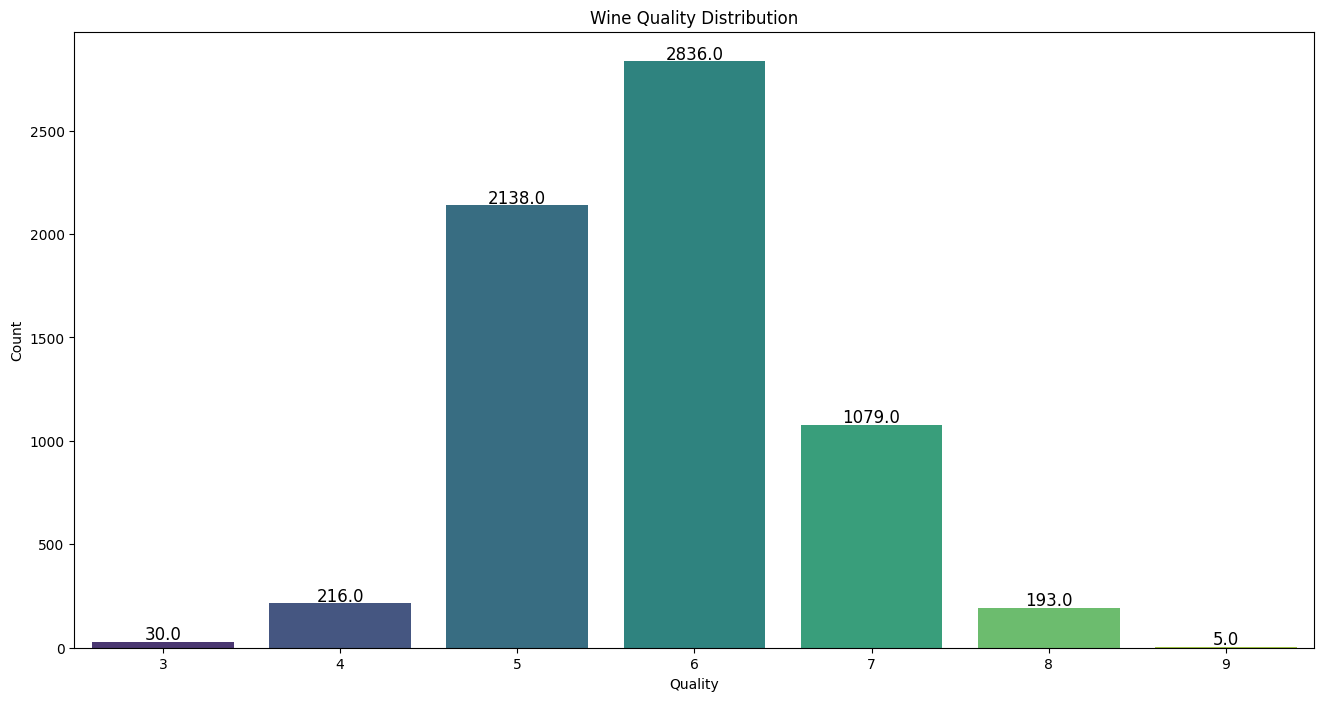

In [29]:
# Understanding the distribution of wine by quality
sns.axes_style('whitegrid')
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='quality', data=df, palette='viridis')
display_annot(ax1)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

### Instights from graph:
 - Most wines are rated 5 and 6 .
 - wine rated 3 & 9 are 30 & 5 respectively.


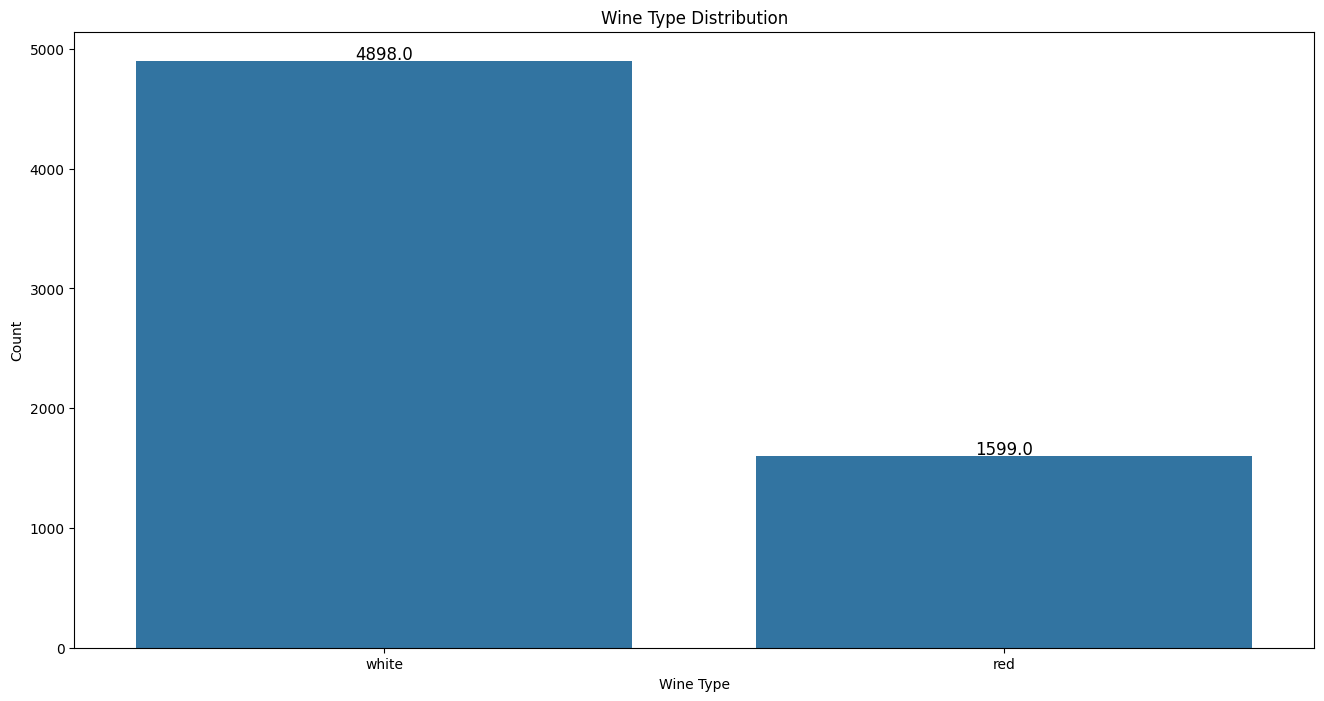

In [30]:
# Understanding the distribution of wine by type
sns.axes_style('whitegrid')
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df,x='type')
plt.title('Wine Type Distribution')
plt.xlabel('Wine Type')
plt.ylabel('Count')

display_annot(ax)

### Insights from the above graph
- there are 4898 white wines.
- there are 1599 red wines.

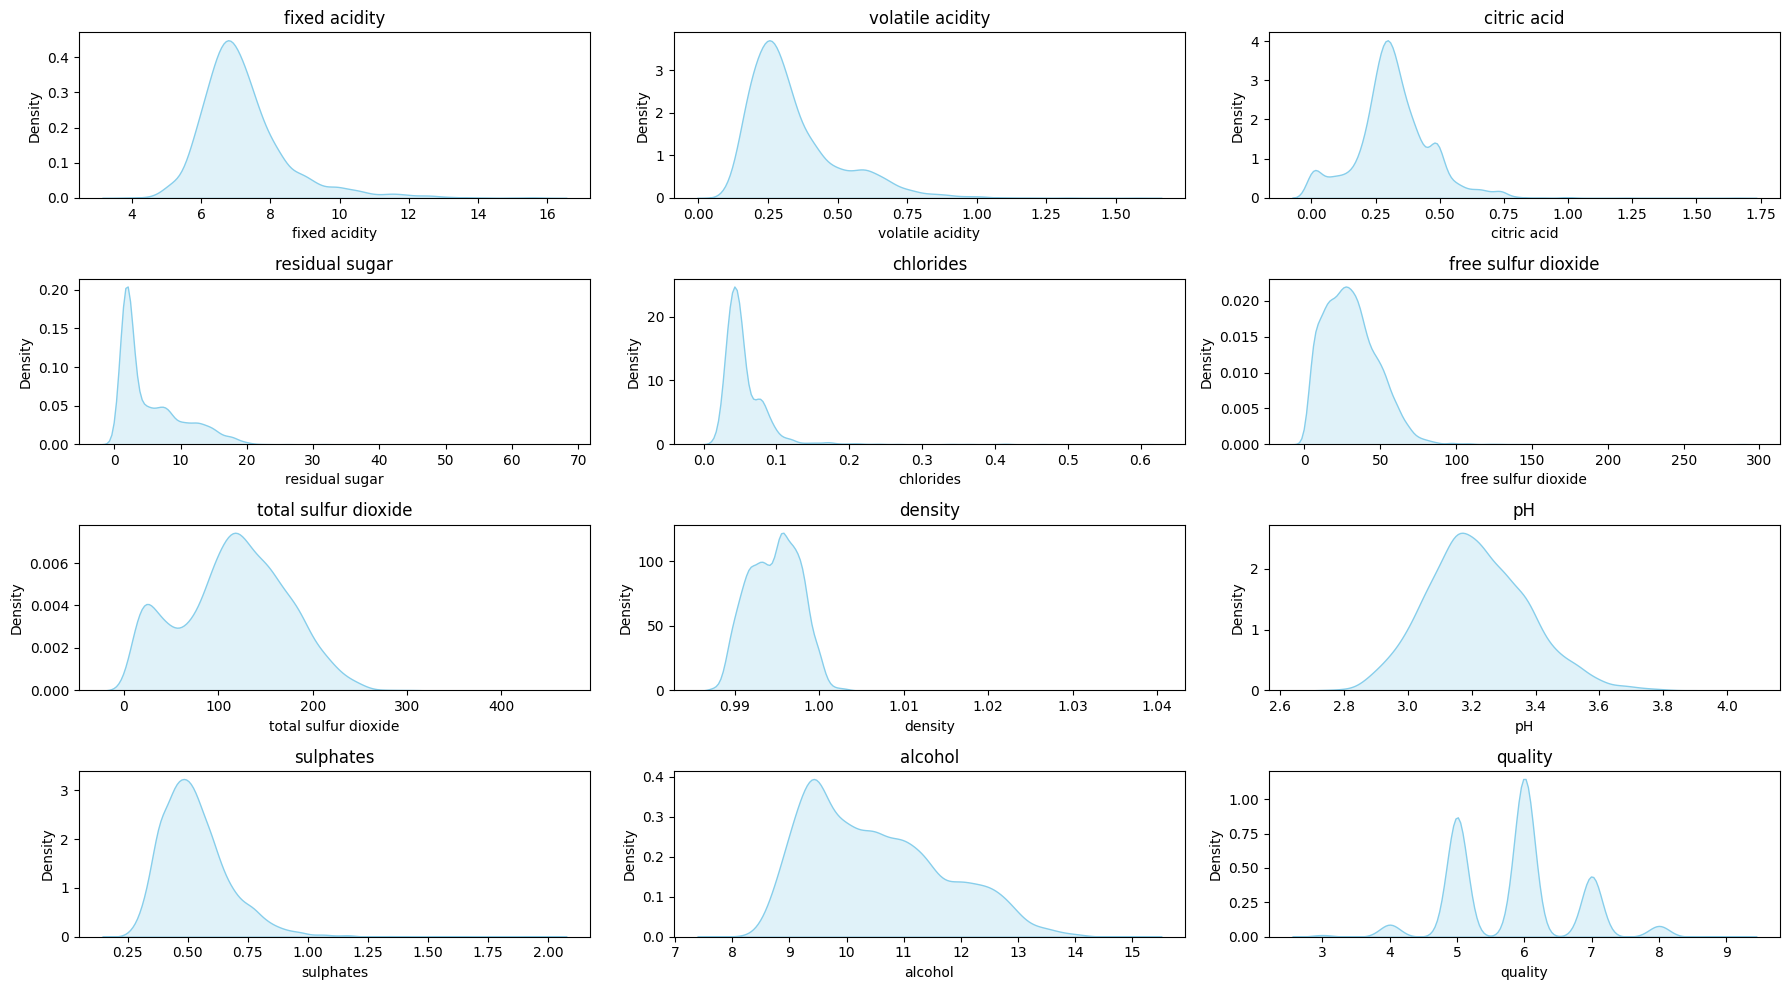

In [ ]:
# KDE plots for all numerical columns
sns.axes_style('whitegrid')
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

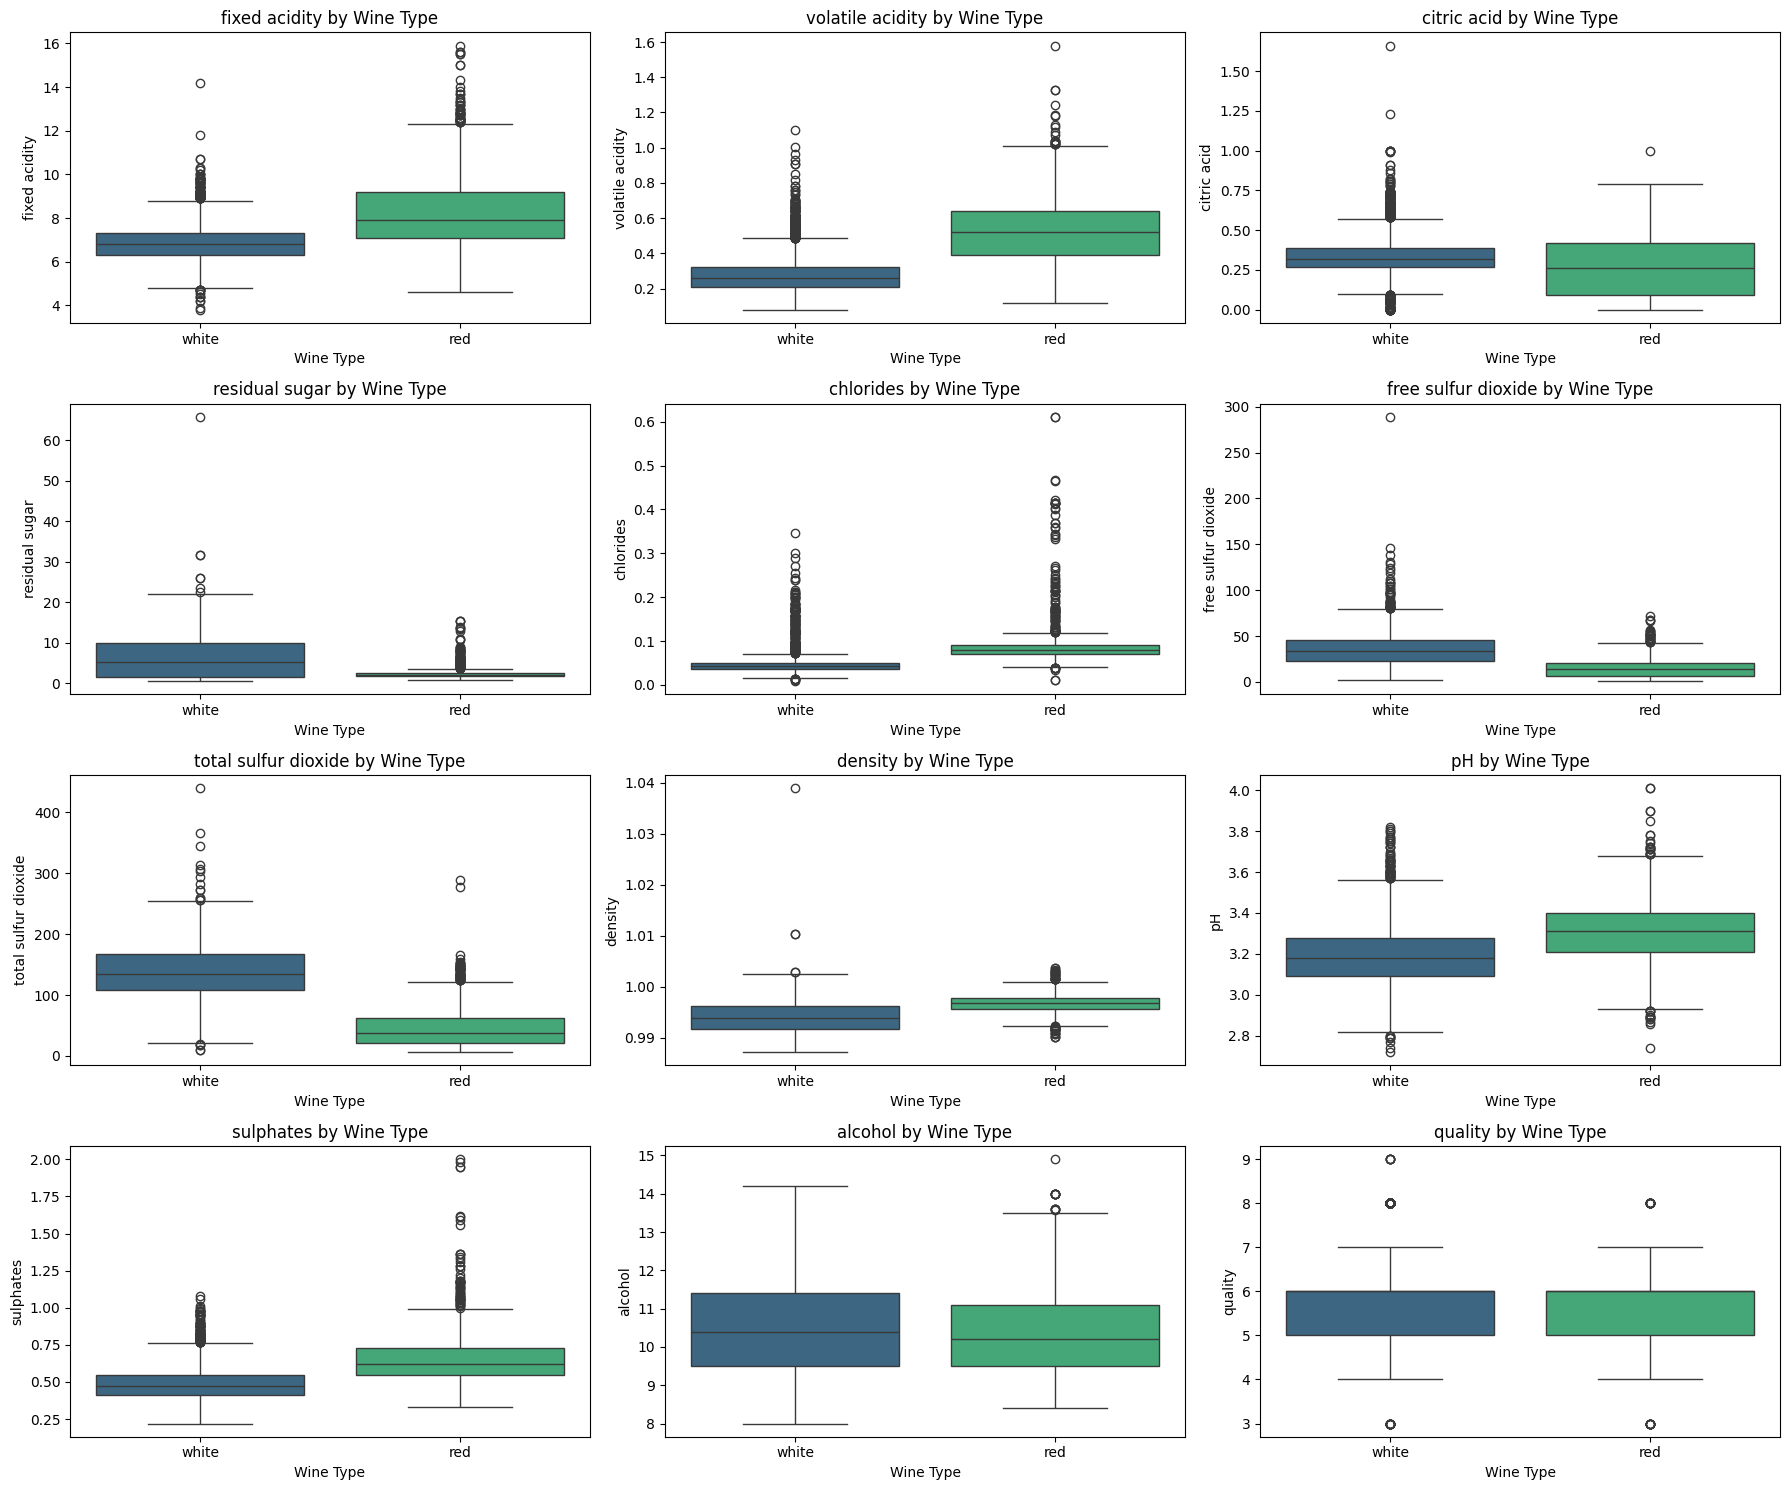

In [ ]:
# Box plots for numerical columns by wine type
sns.axes_style('whitegrid')
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
numeric_cols = df.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(18, 15))
axes = axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.boxplot(x='type',y=col,data=df,
                 ax=axes[i], hue='type', palette='viridis')
    axes[i].set_title(f'{col} by Wine Type')
    axes[i].set_xlabel('Wine Type')
    axes[i].set_ylabel(col)
    plt.tight_layout()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\2105501051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y=col,data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\2105501051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y=col,data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\2105501051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y=col,data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26556\2105501051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is de

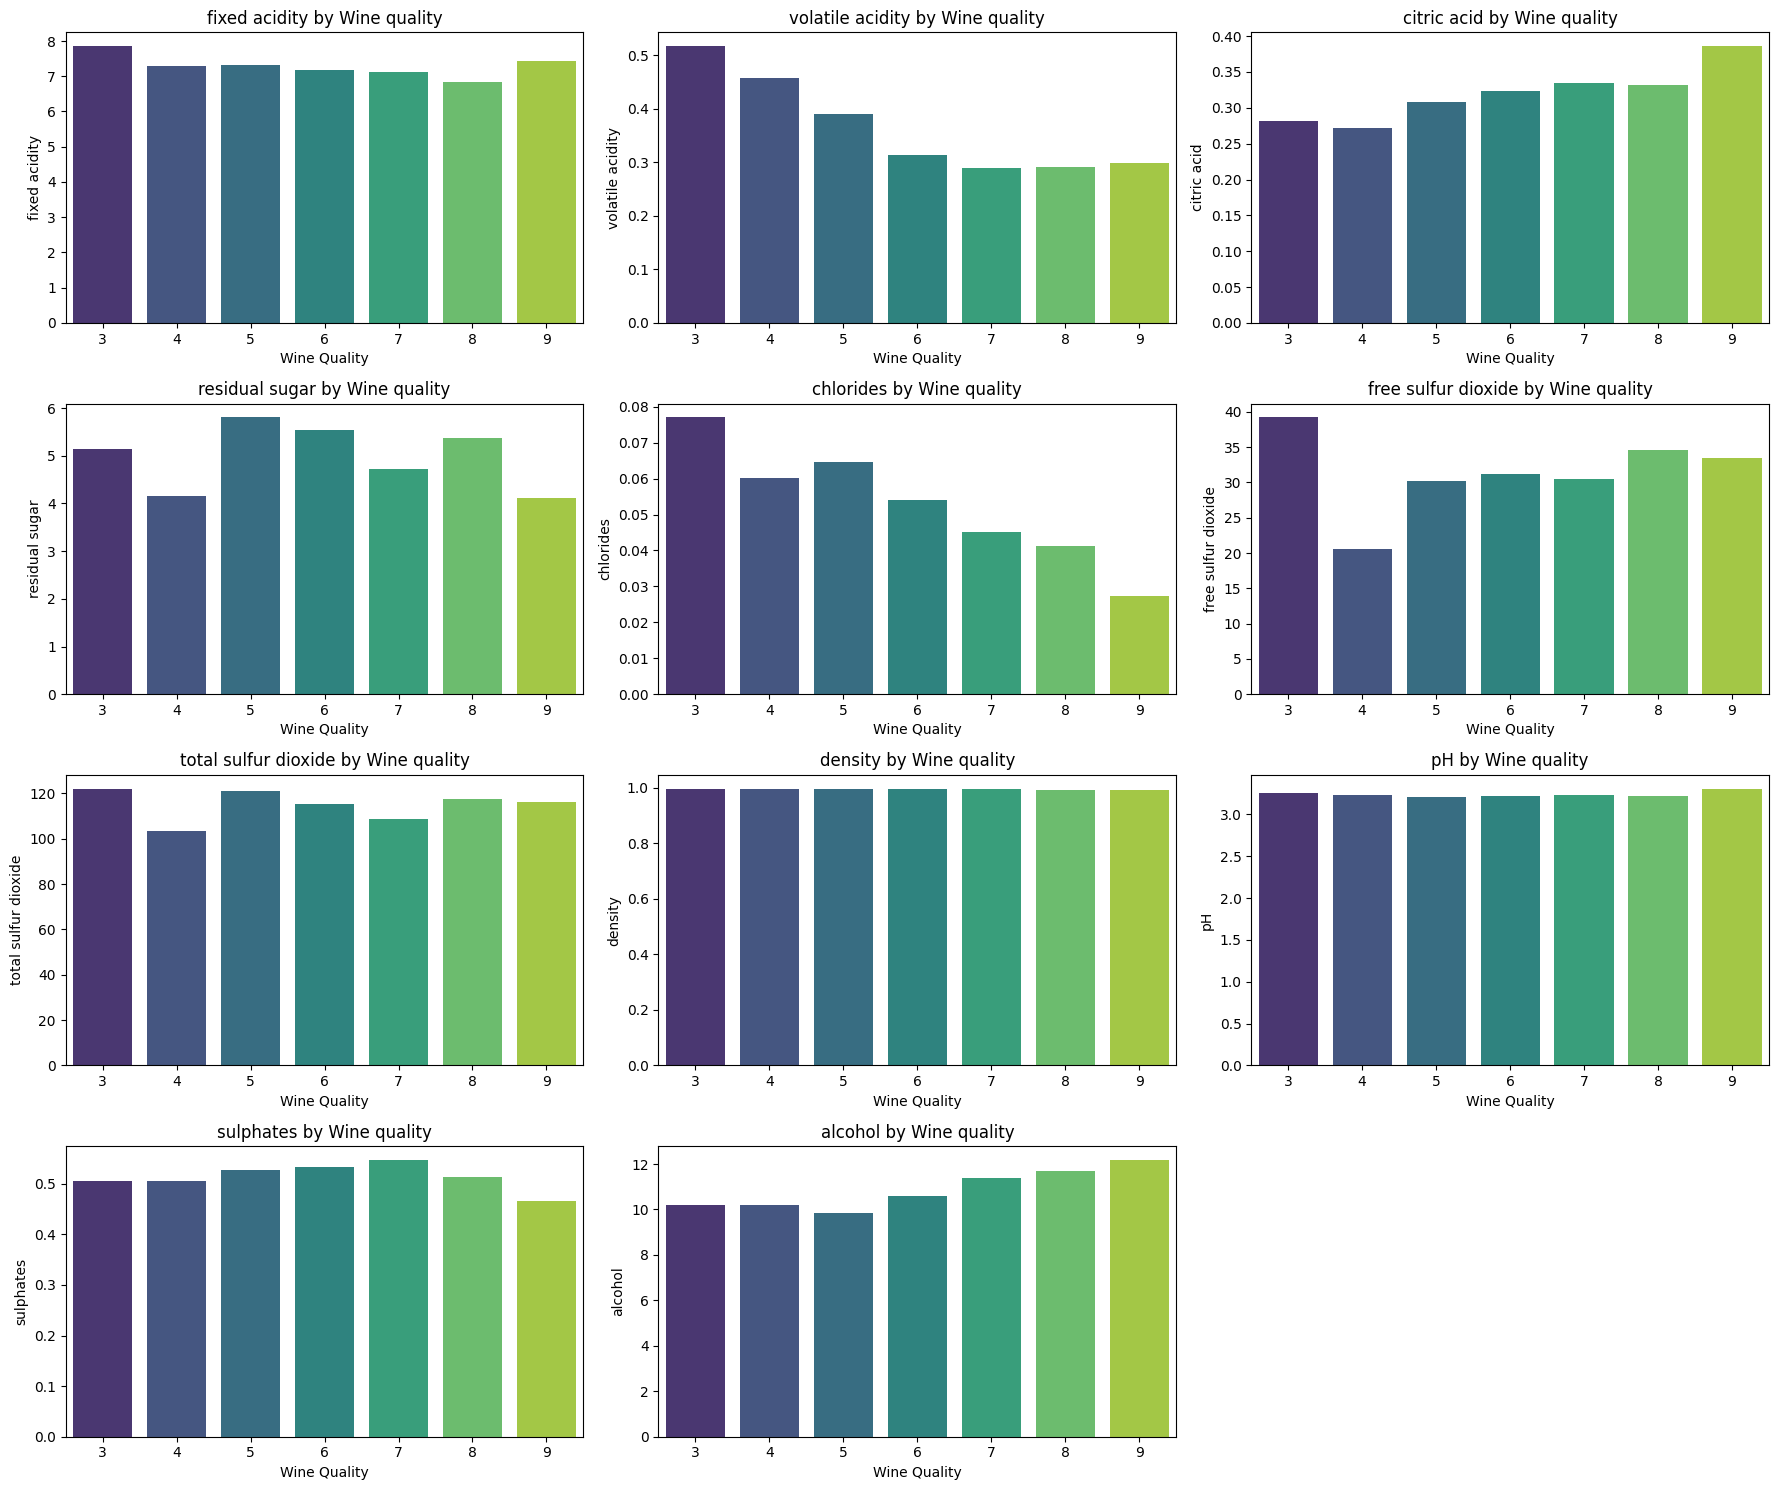

In [39]:
sns.axes_style('whitegrid')

numeric_cols = numeric_cols.drop('quality', errors='ignore')
fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(18, 15))
axes = axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.barplot(x='quality',y=col,data=df,
                 ax=axes[i], palette='viridis',errorbar=None)
    axes[i].set_title(f'{col} by Wine quality')
    axes[i].set_xlabel('Wine Quality')
    axes[i].set_ylabel(col)
    plt.tight_layout()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])